# <b> JPMC Team #1: Company Relationship Analysis Tool </b>

In [163]:
import os
import pandas as pd

In [164]:
#filename = "/Users/annahauk/Desktop/Machine Learning/SP500AdjPrice.csv"
filename = os.path.join(os.getcwd(), "SP500AdjPrice.csv")
df = pd.read_csv(filename, header = 0)

In [165]:
data    = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S%26P_500_component_stocks')
table_symbol   = data[0]
table_industry = data[0]['GICS Sector']

#these 2 lists are in order with one another
symbols = list(table_symbol.Symbol.values)
industries = list(table_industry.values) ##Industry Sector

remove = []

symbols_to_remove = ['BF.B', 'BRK.B', 'KVUE', 'VLTO','SPY']

for i, symbol in enumerate(symbols):
    if symbol in symbols_to_remove:
        remove.append(i)
#print(remove)

#list(set(industries))

for i in remove:
    symbols.remove(symbols[i])
    industries.remove(industries[i])

#print(len(symbols))
#print(set(industries))

symbol_industry = dict(zip(symbols,industries))

df_industries = pd.DataFrame({'Industry': [symbol_industry[symbol] for symbol in symbols]})
df_industries.index = symbol_industry.keys()
df_industries = df_industries.sort_index()
df_industries.head(10)

#for i in industries:
    

,Industry
A,Materials
AAL,Real Estate
AAPL,Information Technology
ABBV,Health Care
ABNB,Information Technology
ABT,Health Care
ACGL,Communication Services
ACN,Information Technology
ADBE,Industrials
ADI,Information Technology


In [166]:
a = len(symbols)

df.index = sorted(symbols)
df = df.drop(columns = "Unnamed: 0", axis = 1)

In [167]:
df.head()

,Adj Close 2023-03-02,Adj Close 2023-03-03,Adj Close 2023-03-06,Adj Close 2023-03-07,Adj Close 2023-03-08,Adj Close 2023-03-09,Adj Close 2023-03-10,Adj Close 2023-03-13,Adj Close 2023-03-14,Adj Close 2023-03-15,Adj Close 2023-03-16,Adj Close 2023-03-17,Adj Close 2023-03-20
A,140.885956,143.133453,142.437317,139.553360,140.120193,138.161102,134.968872,135.933502,137.634033,133.288239,136.062790,132.442917,133.795410
AAL,16.120001,16.360001,16.120001,16.360001,16.590000,15.880000,15.460000,14.850000,14.660000,13.860000,14.120000,13.980000,13.960000
AAPL,145.511978,150.617996,153.410370,151.186447,152.452972,150.179184,148.094894,150.059525,152.173737,152.572647,155.424850,154.577164,156.970612
ABBV,151.295471,152.941910,152.177490,149.874420,146.610977,144.405930,146.718781,148.914017,150.776062,150.981857,152.197098,151.138672,153.000702
ABNB,122.379997,125.730003,126.330002,126.940002,125.000000,119.839996,118.300003,115.959999,116.360001,113.580002,119.989998,118.150002,118.400002


In [168]:
dictionary = dict(zip(symbols,industries))

## Don't need this -- use dataframe instead of dictionary

In [169]:
b = []
unique_industries = list(set(dictionary.values()))
#for i in unique_industries:
    #print(i)
# Initialize lists within the list for each unique industry
for _ in unique_industries:
    b.append([])

# Append companies to their respective industry lists
for key, value in dictionary.items():
    index = unique_industries.index(value)
    b[index].append(key)

* Consumer Discretionary = 0
* Information Technology = 1
* Materials = 2
* Real Estate = 3
* Utilities = 4
* Financials = 5
* Communication Services = 6
* Industrials = 7
* Energy = 8
* Consumer Staples = 9
* Health Care = 10

# <b> <font color = #f6308e > Percentage Price Change Per Day </b> 

In [170]:
df_price = df.T
df_price_pct = df_price.pct_change()[1:]
#finds percent change between current price and prior
df_price_pct.head()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Adj Close 2023-03-03,0.015953,0.014888,0.035090,0.010882,0.027374,0.017734,0.005642,0.014853,0.031604,0.008993,...,0.021339,0.011812,0.012657,0.028132,0.016332,0.007693,0.026262,0.011076,0.019044,0.011745
Adj Close 2023-03-06,-0.004864,-0.014670,0.018539,-0.004998,0.004772,-0.016276,0.005610,0.001597,0.008662,-0.003919,...,-0.003712,-0.000768,0.008865,0.013681,-0.003368,-0.002853,-0.012676,-0.011763,-0.009547,-0.005218
Adj Close 2023-03-07,-0.020247,0.014888,-0.014497,-0.015134,0.004829,-0.026959,-0.009902,-0.020139,-0.006397,-0.003126,...,-0.019411,-0.022137,-0.019331,-0.017316,-0.013517,-0.018407,-0.011796,-0.011935,-0.047580,-0.015560
Adj Close 2023-03-08,0.004062,0.014059,0.008377,-0.021775,-0.015283,-0.005801,-0.009861,-0.002044,0.003016,0.008814,...,0.003358,0.012419,-0.014604,-0.016585,-0.003915,-0.001103,-0.010069,0.016250,0.005168,0.009639
Adj Close 2023-03-09,-0.013982,-0.042797,-0.014915,-0.015040,-0.041280,-0.015594,-0.027173,-0.014792,-0.021600,-0.016133,...,-0.034437,-0.002329,-0.007729,-0.022661,-0.012676,-0.005758,0.003609,-0.033087,-0.113967,-0.006819


In [171]:
df_price_pct.T.isnull().any()

Adj Close 2023-03-03    False
Adj Close 2023-03-06    False
Adj Close 2023-03-07    False
Adj Close 2023-03-08    False
Adj Close 2023-03-09    False
Adj Close 2023-03-10    False
Adj Close 2023-03-13    False
Adj Close 2023-03-14    False
Adj Close 2023-03-15    False
Adj Close 2023-03-16    False
Adj Close 2023-03-17    False
Adj Close 2023-03-20    False
dtype: bool

# <b> <font color = #56beba > Correlations Between Stocks </b> 

In [172]:
price_corr = df_price_pct.corr()
price_corr.head()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
A,1.000000,0.518884,0.791646,0.374019,0.633630,0.810017,0.844036,0.907142,0.633080,0.872986,...,0.769744,0.302473,0.665964,0.743984,0.842873,0.723940,0.581283,0.822347,0.232826,0.829995
AAL,0.518884,1.000000,0.363977,-0.151065,0.736561,0.168846,0.642950,0.615690,0.609986,0.667913,...,0.739896,-0.394522,0.452224,0.273454,0.530967,0.064474,0.102182,0.648352,0.545734,0.338238
AAPL,0.791646,0.363977,1.000000,0.431610,0.610113,0.781189,0.553827,0.815994,0.691611,0.642086,...,0.712923,0.532876,0.515754,0.803460,0.644941,0.761709,0.446678,0.716757,0.305478,0.782668
ABBV,0.374019,-0.151065,0.431610,1.000000,0.339878,0.705050,0.322698,0.290109,0.224160,0.327988,...,0.359326,0.294439,0.311518,0.674333,0.404990,0.548515,0.709122,0.218784,0.018602,0.133277
ABNB,0.633630,0.736561,0.610113,0.339878,1.000000,0.482641,0.751249,0.783877,0.845854,0.700262,...,0.805317,-0.174714,0.398855,0.569476,0.545922,0.349104,0.265397,0.693478,0.571563,0.435598


In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

In [174]:
set(industries)

{'Communication Services',
 'Consumer Discretionary',
 'Consumer Staples',
 'Energy',
 'Financials',
 'Health Care',
 'Industrials',
 'Information Technology',
 'Materials',
 'Real Estate',
 'Utilities'}

In [175]:
df = df.join(df_industries)

# <b> Looking at Correlation between daily stock returns </b>

In [176]:
df.tail()

,Adj Close 2023-03-02,Adj Close 2023-03-03,Adj Close 2023-03-06,Adj Close 2023-03-07,Adj Close 2023-03-08,Adj Close 2023-03-09,Adj Close 2023-03-10,Adj Close 2023-03-13,Adj Close 2023-03-14,Adj Close 2023-03-15,Adj Close 2023-03-16,Adj Close 2023-03-17,Adj Close 2023-03-20,Industry
YUM,127.485069,128.465866,128.099319,125.741402,125.602715,124.879494,123.423141,123.730255,125.523445,125.949463,126.870819,125.672058,127.683220,Consumer Discretionary
ZBH,122.286400,125.497932,123.907082,122.445480,121.212585,121.650070,122.823318,123.539192,125.905579,124.543419,124.712440,123.598854,125.607292,Health Care
ZBRA,306.059998,309.450012,305.809998,302.160004,307.070007,296.910004,288.190002,284.920013,292.459991,287.739990,294.929993,288.709991,290.839996,Information Technology
ZION,46.931580,47.825329,47.368736,45.114933,45.348087,40.179882,39.198696,29.114870,30.416636,29.833755,31.193810,29.085726,29.318878,Financials
ZTS,167.849579,169.820999,168.934845,166.306290,167.909317,166.764313,160.830124,162.701996,163.846985,162.861298,165.589417,163.757385,165.101547,Health Care


In [177]:
df2 = df.drop(columns= 'Industry', axis = 1)
a = df2.iloc[:, : 5]
b = df2.iloc[:, :30:6]
b

,Adj Close 2023-03-02,Adj Close 2023-03-10,Adj Close 2023-03-20
A,140.885956,134.968872,133.795410
AAL,16.120001,15.460000,13.960000
AAPL,145.511978,148.094894,156.970612
ABBV,151.295471,146.718781,153.000702
ABNB,122.379997,118.300003,118.400002
...,...,...,...
YUM,127.485069,123.423141,127.683220
ZBH,122.286400,122.823318,125.607292
ZBRA,306.059998,288.190002,290.839996
ZION,46.931580,39.198696,29.318878


In [178]:
x_labels = df2.T.index
x_labels = [label.split(' ')[-1] for label in x_labels]
print(x_labels)

['2023-03-02', '2023-03-03', '2023-03-06', '2023-03-07', '2023-03-08', '2023-03-09', '2023-03-10', '2023-03-13', '2023-03-14', '2023-03-15', '2023-03-16', '2023-03-17', '2023-03-20']


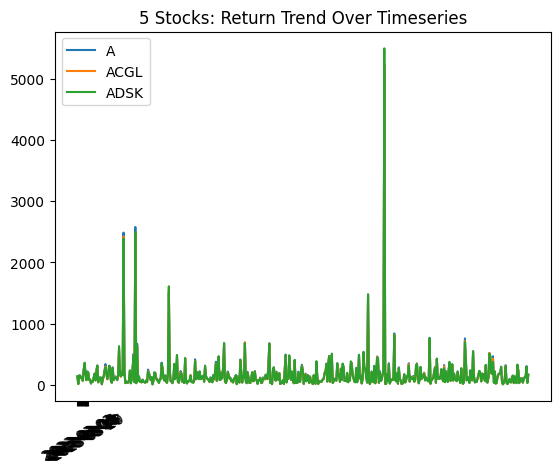

In [179]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.plot(b)
plt.title('5 Stocks: Return Trend Over Timeseries')
plt.legend (['A','ACGL','ADSK','AIZ', 'ALL'], loc = 2)
x_ticks = np.arange(0, len(x_labels))

plt.xticks(x_ticks, x_labels, rotation=30)
plt.show()

In [180]:
selected_stocks = ['A', 'ACGL', 'ADSK', 'AIZ', 'ALL']
df_selected = df.T[selected_stocks]
df_selected = df_selected.T
df_selected = df_selected.drop(columns= 'Industry', axis = 1)
df_selected

,Adj Close 2023-03-02,Adj Close 2023-03-03,Adj Close 2023-03-06,Adj Close 2023-03-07,Adj Close 2023-03-08,Adj Close 2023-03-09,Adj Close 2023-03-10,Adj Close 2023-03-13,Adj Close 2023-03-14,Adj Close 2023-03-15,Adj Close 2023-03-16,Adj Close 2023-03-17,Adj Close 2023-03-20
A,140.885956,143.133453,142.437317,139.55336,140.120193,138.161102,134.968872,135.933502,137.634033,133.288239,136.06279,132.442917,133.79541
ACGL,70.900002,71.300003,71.699997,70.989998,70.290001,68.379997,66.610001,65.18,67.339996,62.740002,66.07,63.150002,65.610001
ADSK,201.130005,207.460007,208.330002,205.479996,204.509995,200.490005,194.020004,197.869995,199.220001,195.789993,200.589996,199.110001,200.419998
AIZ,124.48246,125.105827,122.780617,120.257523,120.772034,118.615036,115.518066,111.80764,112.242996,110.046417,109.799065,103.812897,110.016739
ALL,124.197632,126.017128,125.495865,122.525665,120.381607,117.431084,116.250862,112.297157,112.47419,108.786026,110.251457,103.376724,107.399277


In [181]:
x_labels2 = [str(date) for date in df_selected.T.index]
x_labels2

['Adj Close 2023-03-02',
 'Adj Close 2023-03-03',
 'Adj Close 2023-03-06',
 'Adj Close 2023-03-07',
 'Adj Close 2023-03-08',
 'Adj Close 2023-03-09',
 'Adj Close 2023-03-10',
 'Adj Close 2023-03-13',
 'Adj Close 2023-03-14',
 'Adj Close 2023-03-15',
 'Adj Close 2023-03-16',
 'Adj Close 2023-03-17',
 'Adj Close 2023-03-20']

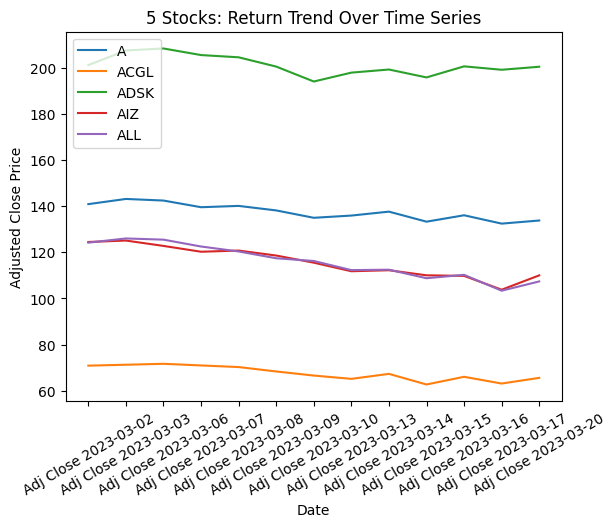

In [182]:
# Plotting the data
plt.plot(df_selected.T)
plt.title('5 Stocks: Return Trend Over Time Series')
plt.legend(selected_stocks, loc=2)
x_ticks = np.arange(0, len(x_labels2))

plt.xticks(x_ticks, x_labels2, rotation=30)
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

In [183]:
c = df.loc['AIZ', df.columns[-1]]
print(c)
d = df.loc['ALL', df.columns[-1]]
print(d)

Consumer Discretionary
Consumer Discretionary


We see there is a correlation between AIZ and ALL since they follow eachother closely in the graph. Turns out, they're part of the same industry and we can calculate their correlation (later when we do Consumer Discretionary).

## <b> <font color = #f6308e > Information Technology </b> 
##### Technology and software development, hardware manufacturing, cloud computing, and IT services

In [184]:
it = df[df['Industry'] == 'Information Technology']
it.shape
#companies with IT as its industry


(64, 14)

In [185]:
it = it.drop(columns= 'Industry', axis = 1)
df_price_it = it.T
df_price_pct_it = df_price_it.pct_change()[1:]

price_corr_it = df_price_pct_it.corr()
price_corr_it.head()

,AAPL,ABNB,ACN,ADI,ADM,AJG,AME,AMP,ANSS,AWK,...,SYF,TEL,TFC,TFX,TGT,TRV,TSLA,VLTO,WDC,ZBRA
AAPL,1.000000,0.610113,0.815994,0.642086,0.686596,0.651450,0.687665,0.656997,0.743011,0.714978,...,0.423497,0.779568,0.393627,0.405180,0.655479,0.420452,0.673142,0.678880,0.529029,0.716757
ABNB,0.610113,1.000000,0.783877,0.700262,0.347021,0.839915,0.501560,0.713344,0.316759,0.435692,...,0.591906,0.539560,0.521382,0.449946,0.575191,0.705801,0.597473,0.722032,0.704785,0.693478
ACN,0.815994,0.783877,1.000000,0.819936,0.654004,0.908389,0.865492,0.775172,0.656200,0.713760,...,0.619560,0.863185,0.471910,0.653411,0.713162,0.659872,0.596305,0.860431,0.813427,0.806578
ADI,0.642086,0.700262,0.819936,1.000000,0.695289,0.855122,0.848334,0.838574,0.660171,0.776935,...,0.659587,0.860201,0.239375,0.570621,0.583107,0.537964,0.715607,0.865515,0.804478,0.913041
ADM,0.686596,0.347021,0.654004,0.695289,1.000000,0.668484,0.846070,0.721061,0.640381,0.887837,...,0.444065,0.824984,0.216737,0.212429,0.661253,0.562415,0.657865,0.734925,0.417471,0.675388


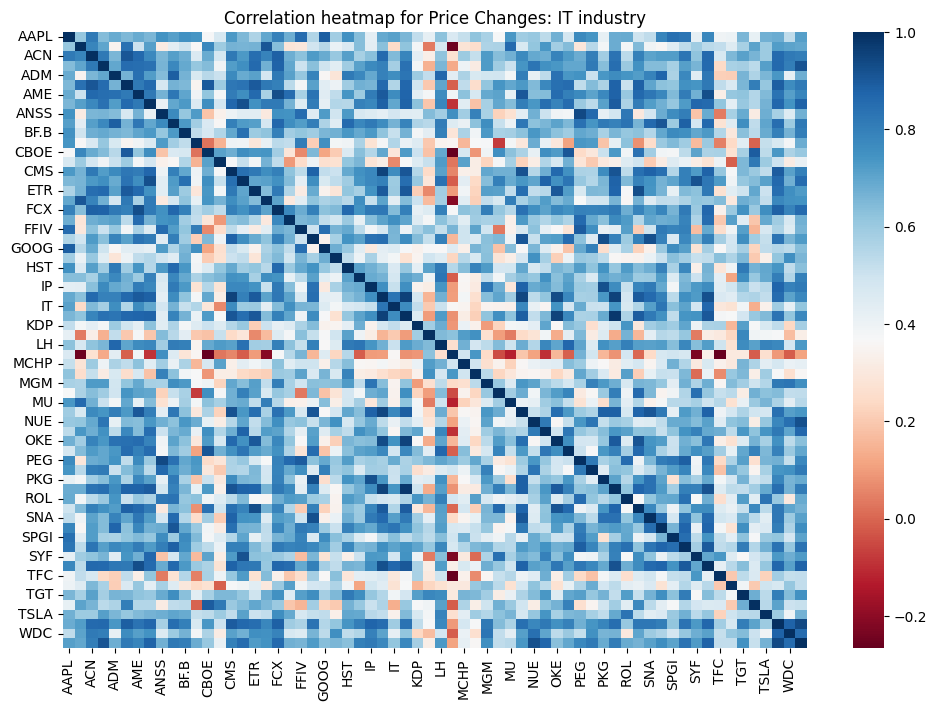

In [186]:
plt.figure(figsize=(12,8))
sns.heatmap(price_corr_it, cmap = 'RdBu').set_title("Correlation heatmap for Price Changes: IT industry")
plt.show()

## <b> <font color = #f6308e > Communication Services </b> 
##### Telecommunications, cable, broadcasting, and internet services

In [187]:
commserv = df[df['Industry'] == 'Communication Services']
commserv.shape
#companies with Communication Services as its industry

(21, 14)

In [188]:
commserv = commserv.drop(columns= 'Industry', axis = 1)
df_price_commserv = commserv.T
df_price_pct_commserv = df_price_commserv.pct_change()[1:]

price_corr_commserv = df_price_pct_commserv.corr()
price_corr_commserv.head()

,ACGL,ALLE,CRL,CTSH,DLR,EIX,FTNT,FTV,IFF,LIN,...,MRK,NEM,NTAP,NWSA,ODFL,PANW,SYY,TROW,VRSK,WBD
ACGL,1.000000,0.898143,0.307939,0.802061,0.600930,0.962126,0.701991,0.648548,0.720897,0.876000,...,0.391549,0.233377,0.760082,0.755533,0.579797,0.408716,0.394850,0.290108,0.596355,0.529658
ALLE,0.898143,1.000000,0.549494,0.707506,0.829822,0.899091,0.826111,0.818257,0.776148,0.933532,...,0.469861,0.433893,0.843310,0.892210,0.725061,0.401016,0.526471,0.559337,0.813236,0.663120
CRL,0.307939,0.549494,1.000000,0.042675,0.631953,0.277005,0.470475,0.658111,0.467069,0.447056,...,0.708370,0.463369,0.554276,0.505982,0.437072,0.018742,0.750677,0.702367,0.674453,0.204327
CTSH,0.802061,0.707506,0.042675,1.000000,0.389159,0.719733,0.613849,0.359805,0.627793,0.759153,...,0.326643,-0.064404,0.416968,0.597397,0.559536,0.383316,0.240862,0.168323,0.484039,0.435745
DLR,0.600930,0.829822,0.631953,0.389159,1.000000,0.630458,0.751006,0.861891,0.804632,0.802367,...,0.530505,0.764416,0.832698,0.751073,0.724537,0.503207,0.576421,0.696719,0.889273,0.666935


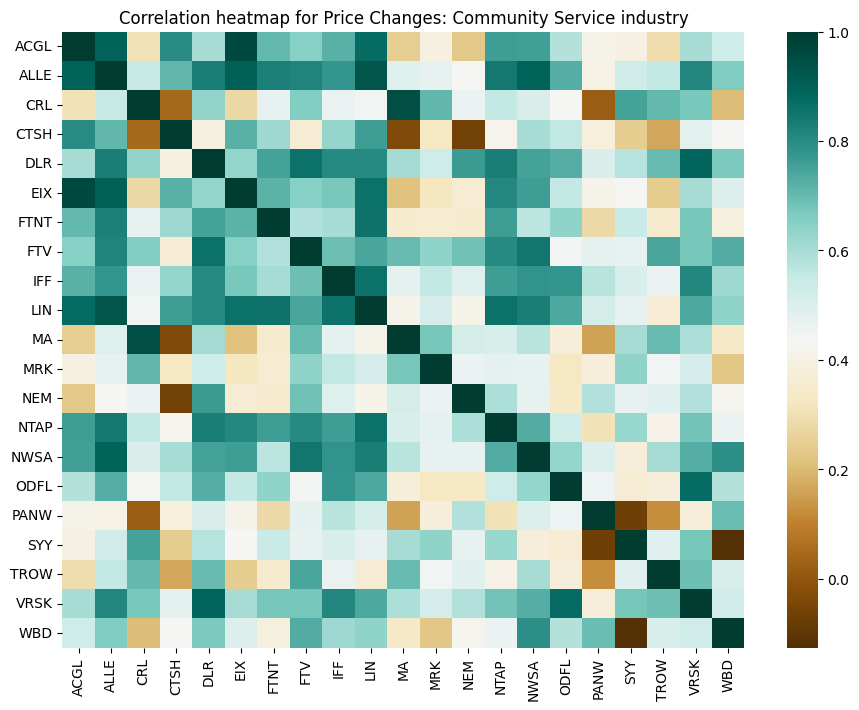

In [189]:
plt.figure(figsize=(11,8))
sns.heatmap(price_corr_commserv, cmap = 'BrBG').set_title("Correlation heatmap for Price Changes: Community Service industry")
plt.show()

## <b> <font color = #f6308e > Consumer Discretionary </b> 
##### Retail, automotive, entertainment, and hospitality

In [190]:
consume = df[df['Industry'] == 'Consumer Discretionary']
consume.shape

(53, 14)

In [191]:
consume = consume.drop(columns= 'Industry', axis = 1)
df_price_consume = consume.T



df_price_pct_consume = df_price_consume.pct_change()[1:]
# Calculate the correlation matrix
price_corr_consume = df_price_pct_consume.corr()
# Calculate 1 - |correlation|
complement_corr_consume = 1 - abs(price_corr_consume)

complement_corr_consume.head()

,AFL,AIZ,ALL,AON,AXON,BAX,BEN,BK,BX,CAH,...,SWK,TER,TJX,TMO,TTWO,UDR,VFC,WHR,WYNN,YUM
AFL,0.000000,0.208046,0.108207,0.272195,0.844768,0.477544,0.413332,0.679074,0.163505,0.416557,...,0.328446,0.421779,0.240894,0.258800,0.569440,0.593650,0.756360,0.350666,0.192697,0.321492
AIZ,0.208046,0.000000,0.118376,0.577363,0.762069,0.450294,0.410703,0.728188,0.377139,0.356101,...,0.220707,0.515747,0.454854,0.444899,0.844392,0.399996,0.703280,0.326406,0.541782,0.298381
ALL,0.108207,0.118376,0.000000,0.367117,0.820968,0.576964,0.378753,0.594522,0.291297,0.388325,...,0.228371,0.513377,0.393523,0.341034,0.796119,0.512054,0.924384,0.436018,0.388284,0.354123
AON,0.272195,0.577363,0.367117,0.000000,0.685697,0.581231,0.424702,0.495287,0.332485,0.604752,...,0.484541,0.302810,0.470238,0.291191,0.531700,0.812131,0.889568,0.396241,0.251422,0.530246
AXON,0.844768,0.762069,0.820968,0.685697,0.000000,0.413969,0.298161,0.781198,0.873909,0.392943,...,0.447554,0.562149,0.490754,0.614311,0.520251,0.291068,0.533409,0.530530,0.682907,0.266899


In [214]:
df_price_pct_consume

,AFL,AIZ,ALL,AON,AXON,BAX,BEN,BK,BX,CAH,...,SWK,TER,TJX,TMO,TTWO,UDR,VFC,WHR,WYNN,YUM
Adj Close 2023-03-03,0.013025,0.005008,0.014650,0.007555,0.008227,0.019107,0.013934,0.000418,0.002170,-0.000279,...,0.020824,0.009603,0.015643,0.019481,0.012318,0.020660,-0.001141,0.009238,0.021339,0.007693
Adj Close 2023-03-06,-0.003214,-0.018586,-0.004136,0.004144,0.001575,-0.017347,-0.004215,-0.017575,-0.010628,0.001953,...,-0.016077,-0.013394,0.004364,-0.001644,-0.008483,-0.002327,-0.053694,-0.010812,-0.003712,-0.002853
Adj Close 2023-03-07,-0.017004,-0.020550,-0.023668,-0.012314,-0.019940,-0.022290,-0.000381,-0.009248,-0.005769,-0.002228,...,-0.011873,-0.010526,-0.016230,-0.017349,0.010111,-0.024720,-0.023743,-0.018508,-0.019411,-0.018407
Adj Close 2023-03-08,-0.014017,0.004278,-0.017499,-0.002620,0.008095,0.012402,-0.003811,-0.017259,0.001801,0.001954,...,-0.000119,0.026546,0.002598,0.010786,-0.004877,0.006456,-0.009893,0.014774,0.003358,-0.001103
Adj Close 2023-03-09,-0.019359,-0.017860,-0.024510,-0.013332,-0.017144,-0.014772,-0.008919,0.013094,-0.021770,-0.022841,...,-0.018442,-0.010751,-0.028634,-0.002776,-0.028802,-0.019957,-0.029933,-0.017851,-0.034437,-0.005758


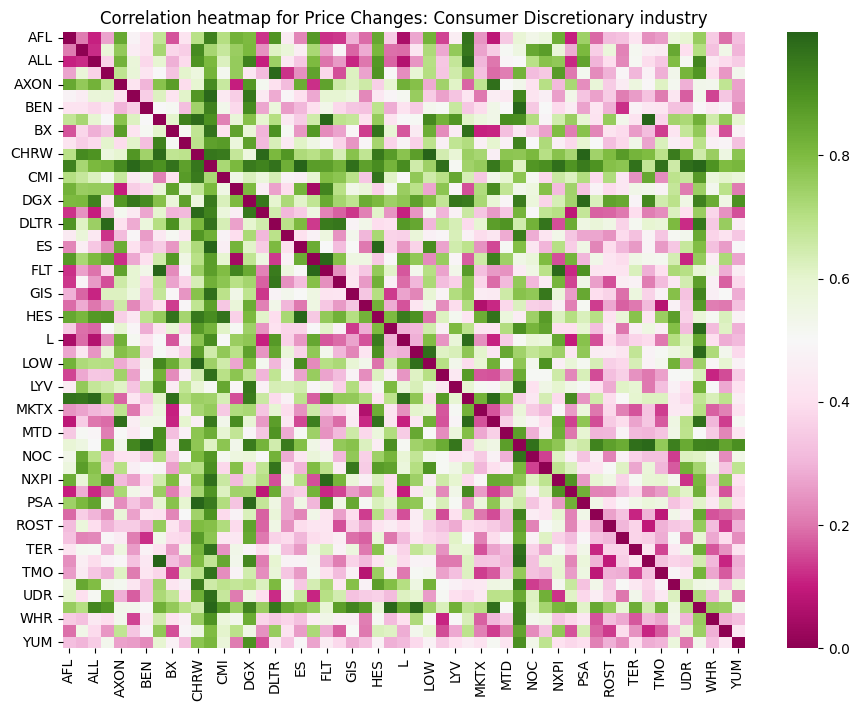

In [192]:
plt.figure(figsize=(11,8))
sns.heatmap(complement_corr_consume, cmap = 'PiYG').set_title("Correlation heatmap for Price Changes: Consumer Discretionary industry")
plt.show()
#RdBu

## <b> <font color = #f6308e > Consumer Staples </b> 
##### Food, beverages, household goods, and personal care items,

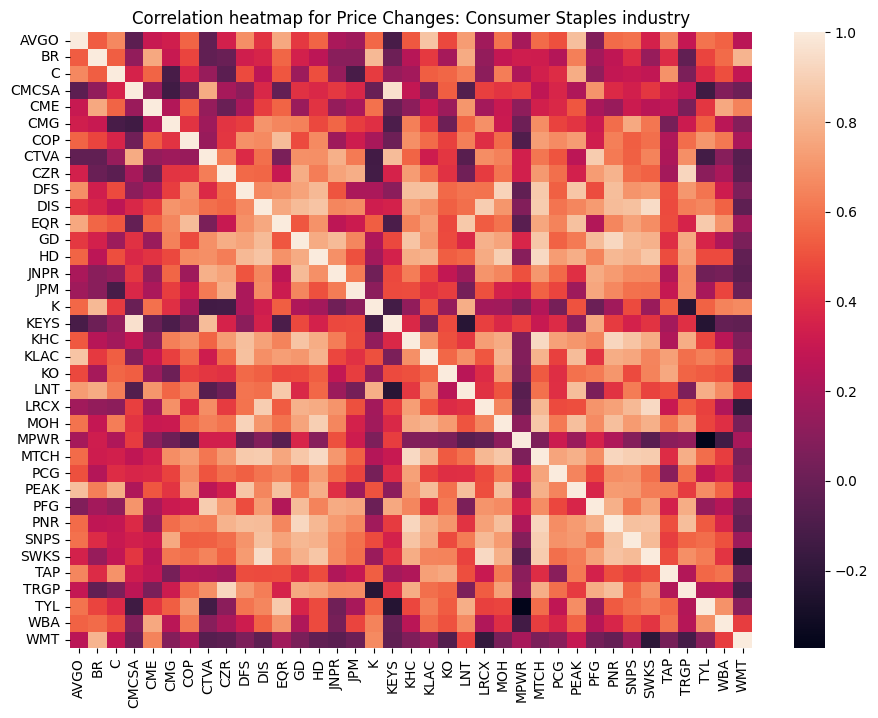

In [193]:
staples = df[df['Industry'] == 'Consumer Staples']
staples = staples.drop(columns= 'Industry', axis = 1)
df_price_staples = staples.T
df_price_pct_staples = df_price_staples.pct_change()[1:]

price_corr_staples = df_price_pct_staples.corr()
plt.figure(figsize=(11,8))
sns.heatmap(price_corr_staples).set_title("Correlation heatmap for Price Changes: Consumer Staples industry")
plt.show()

## <b> <font color = #f6308e > Energy </b> 
##### oil, natural gas, and renewable energy sources


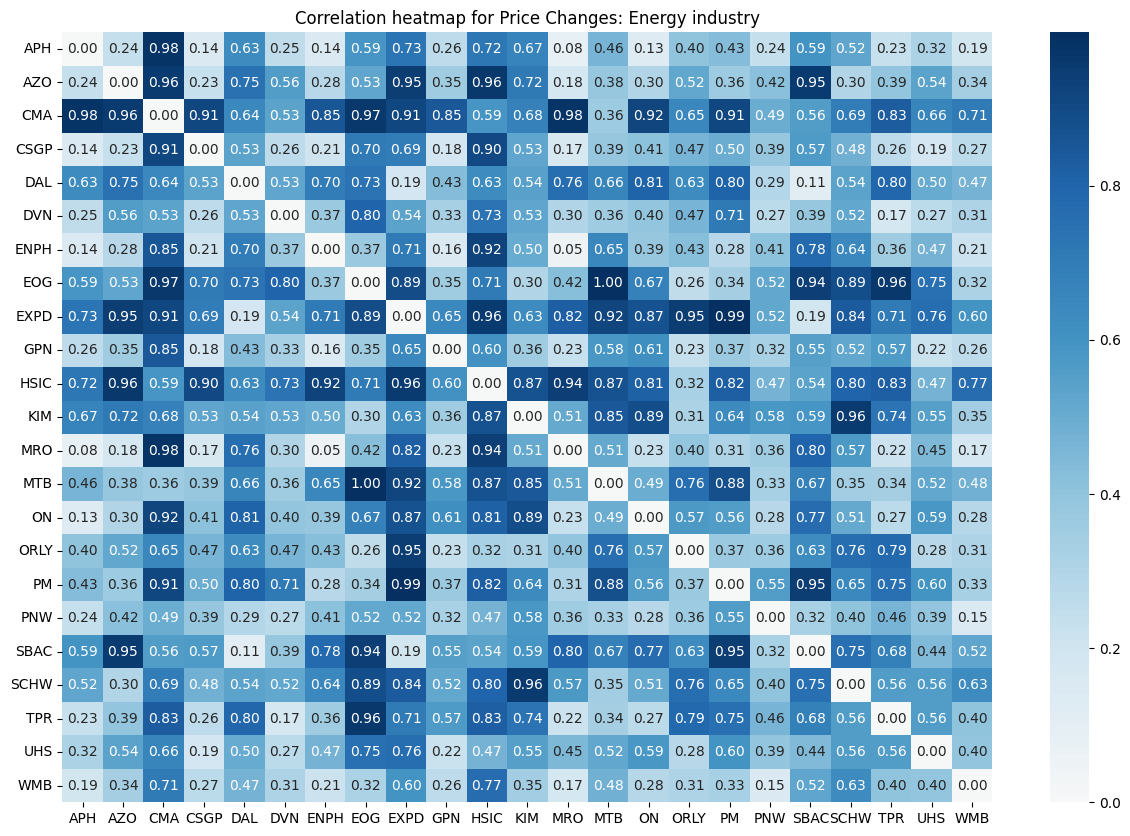

In [194]:
energy = df[df['Industry'] == 'Energy']
energy = energy.drop(columns='Industry', axis=1)
df_price_energy = energy.T
df_price_pct_energy = df_price_energy.pct_change()[1:]

# Modify correlation calculation
price_corr_energy = 1 - abs(df_price_pct_energy.corr())

plt.figure(figsize=(15, 10))
sns.heatmap(price_corr_energy, cmap='RdBu', center=0, annot=True, fmt=".2f").set_title("Correlation heatmap for Price Changes: Energy industry")
plt.show()

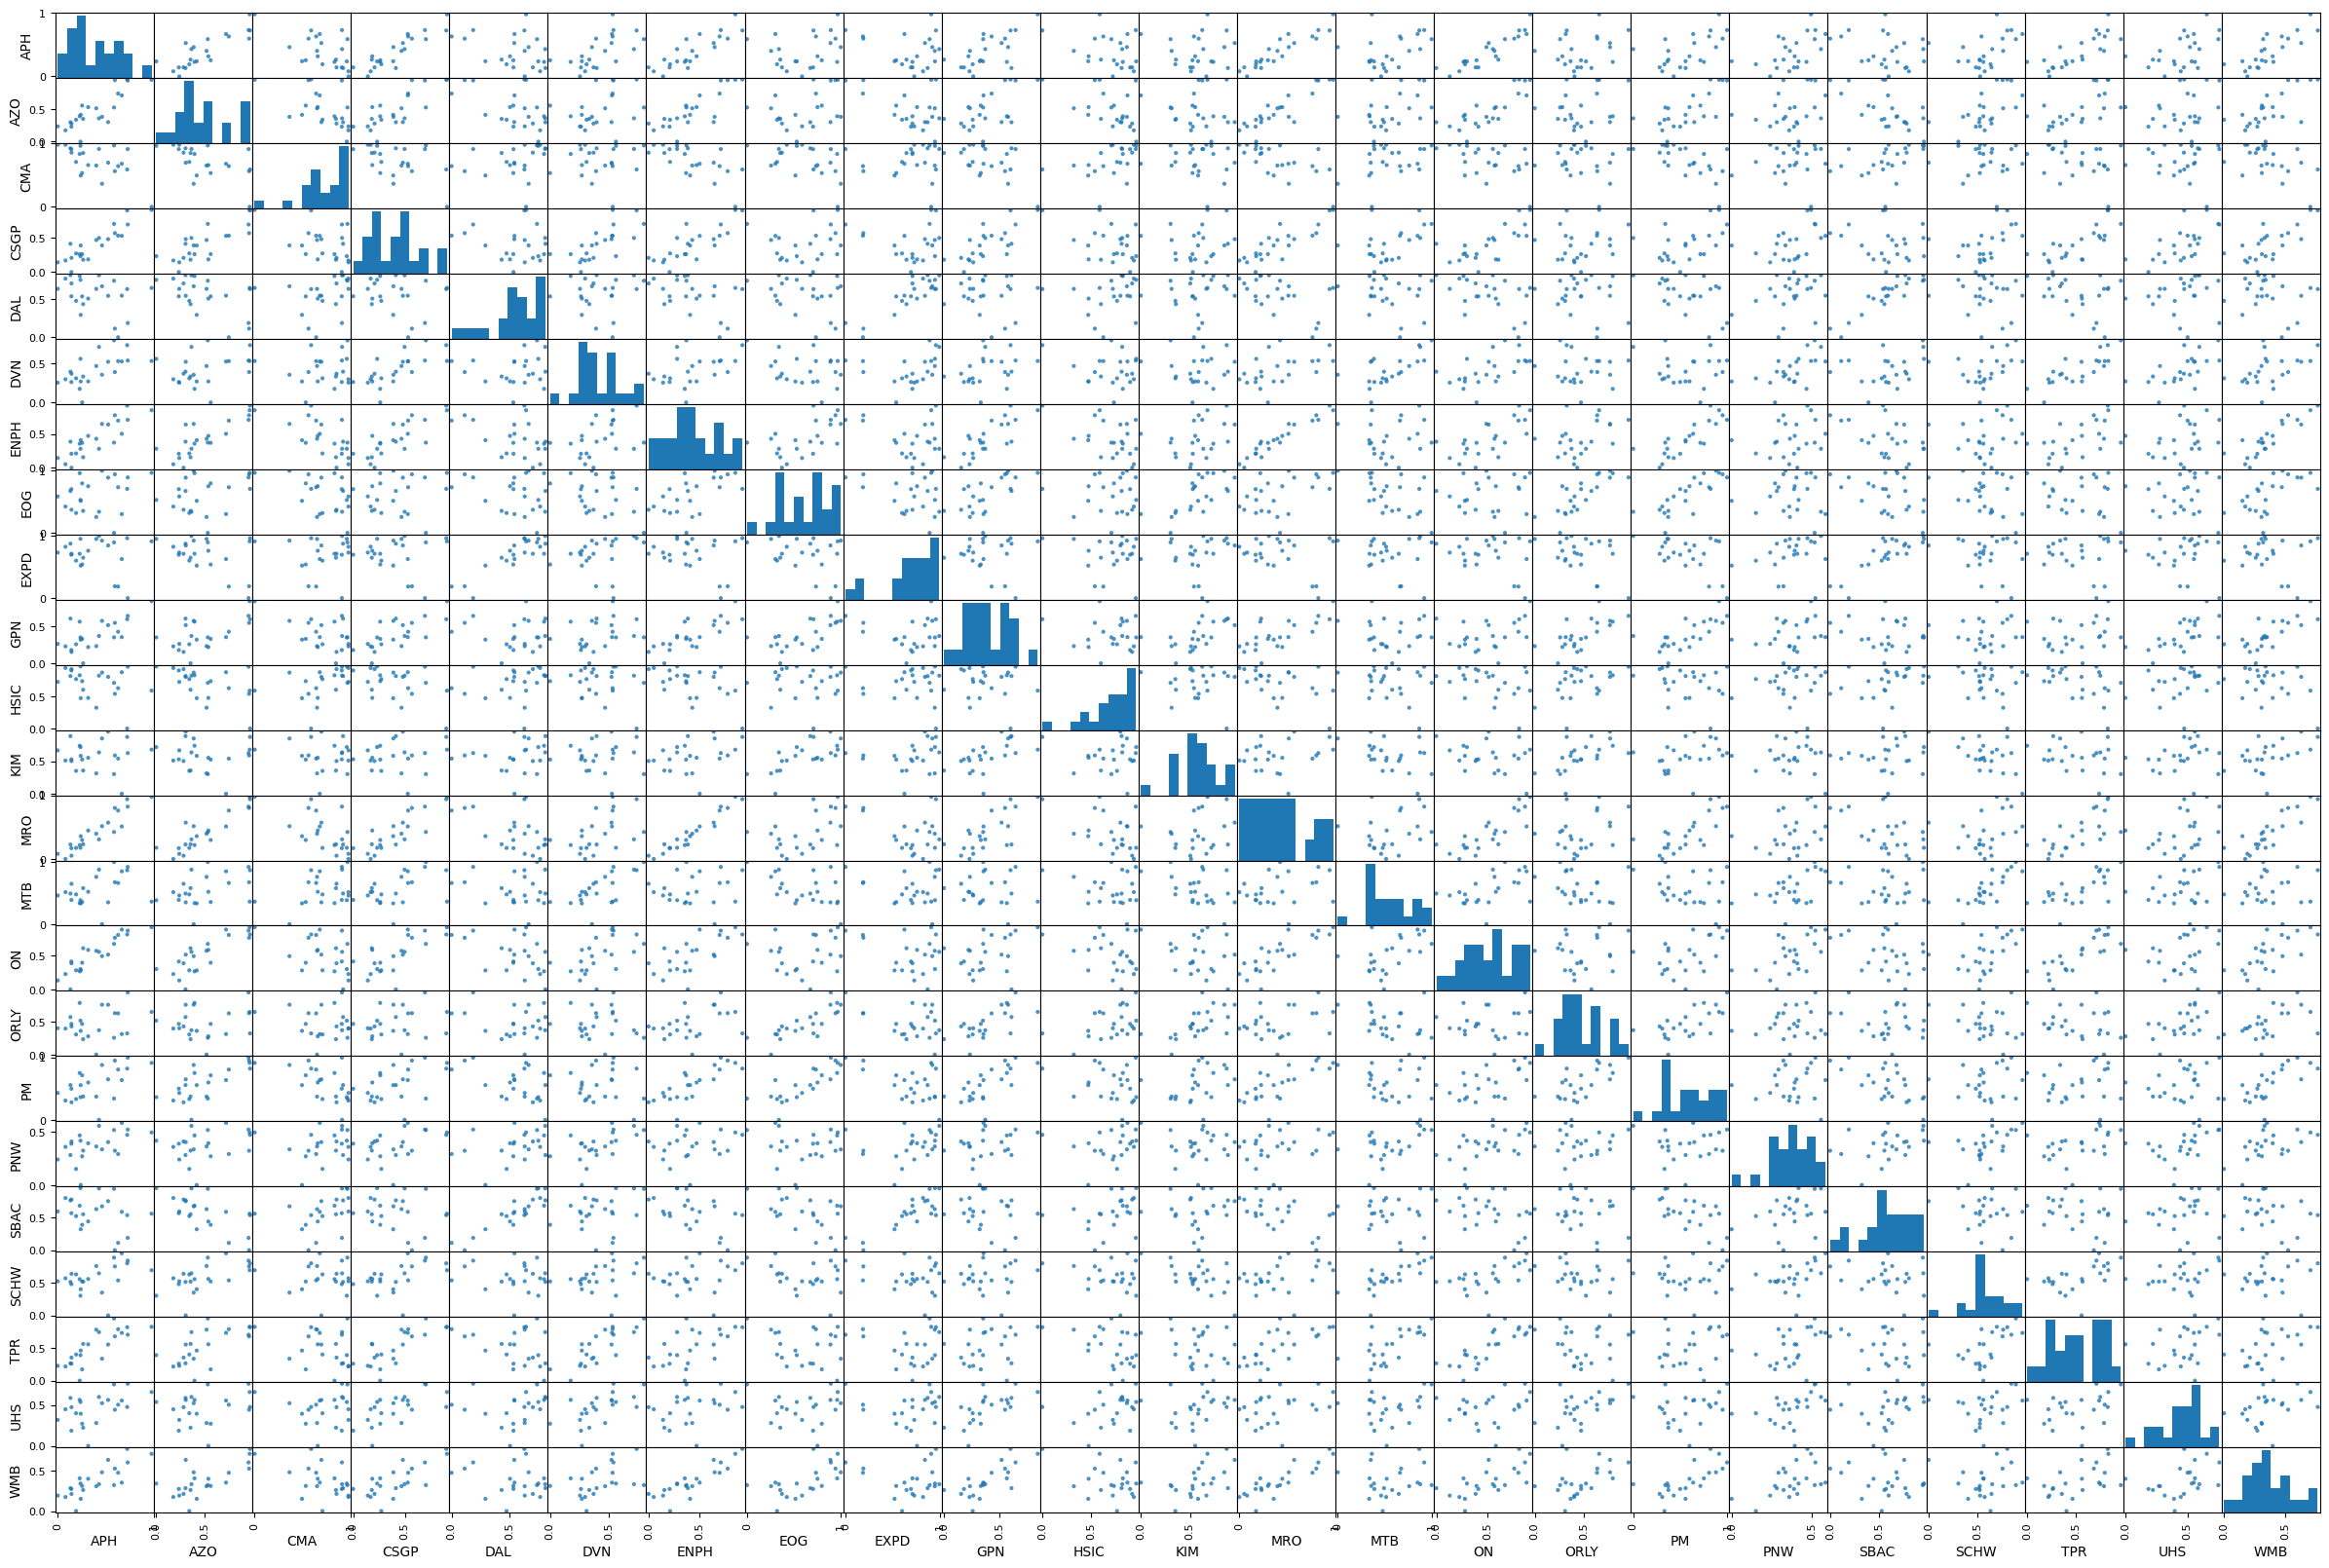

In [195]:
from pandas.plotting import scatter_matrix
scatter_matrix(price_corr_energy, figsize=(30,20),alpha = 0.8)
plt.show()

## <b> <font color = #f6308e > Financials </b> 
##### money management, lending, and insurance

In [196]:
'''
fin = df[df['Industry'] == 'Financials']
fin = fin.drop(columns= 'Industry', axis = 1)
df_price_fin = fin.T
df_price_pct_fin = df_price_fin.pct_change()[1:]

price_corr_fin = df_price_pct_fin.corr()
plt.figure(figsize=(11,8))
sns.heatmap(price_corr_fin, cmap = 'plasma').set_title("Correlation heatmap for Price Changes: Financials industry")
plt.show()
'''

'\nfin = df[df[\'Industry\'] == \'Financials\']\nfin = fin.drop(columns= \'Industry\', axis = 1)\ndf_price_fin = fin.T\ndf_price_pct_fin = df_price_fin.pct_change()[1:]\n\nprice_corr_fin = df_price_pct_fin.corr()\nplt.figure(figsize=(11,8))\nsns.heatmap(price_corr_fin, cmap = \'plasma\').set_title("Correlation heatmap for Price Changes: Financials industry")\nplt.show()\n'

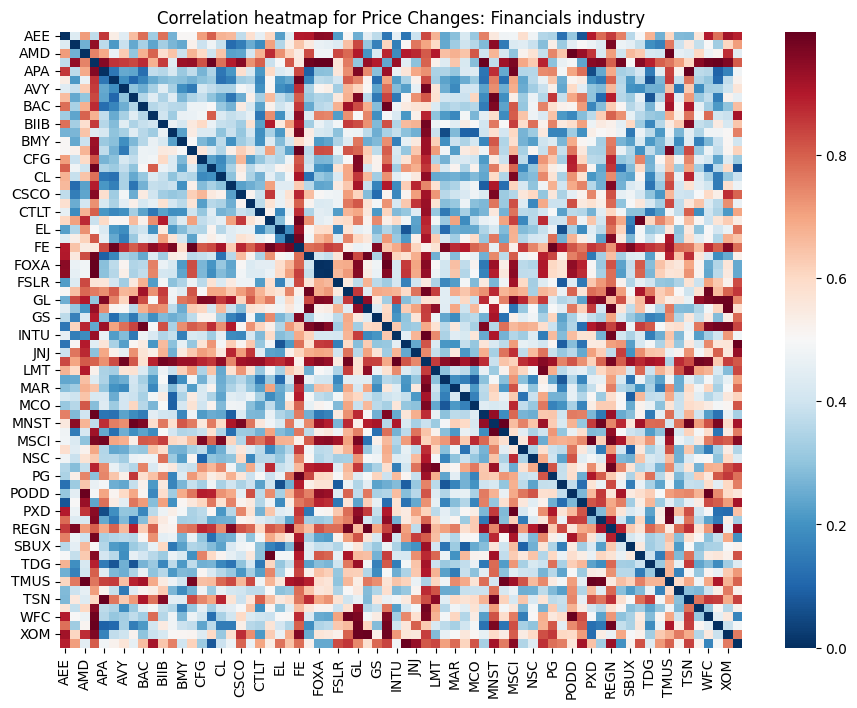

In [197]:
fin = df[df['Industry'] == 'Financials']
fin = fin.drop(columns='Industry', axis=1)
df_price_fin = fin.T
df_price_pct_fin = df_price_fin.pct_change()[1:]

# Modify correlation calculation
price_corr_fin = 1 - abs(df_price_pct_fin.corr())

plt.figure(figsize=(11, 8))
sns.heatmap(price_corr_fin, cmap='RdBu_r').set_title("Correlation heatmap for Price Changes: Financials industry")
plt.show()

In [198]:
fin.shape

(70, 13)

## <b> <font color = #f6308e > Health Care </b> 
##### pharmaceuticals, biotechnology, hospitals, and healthcare services

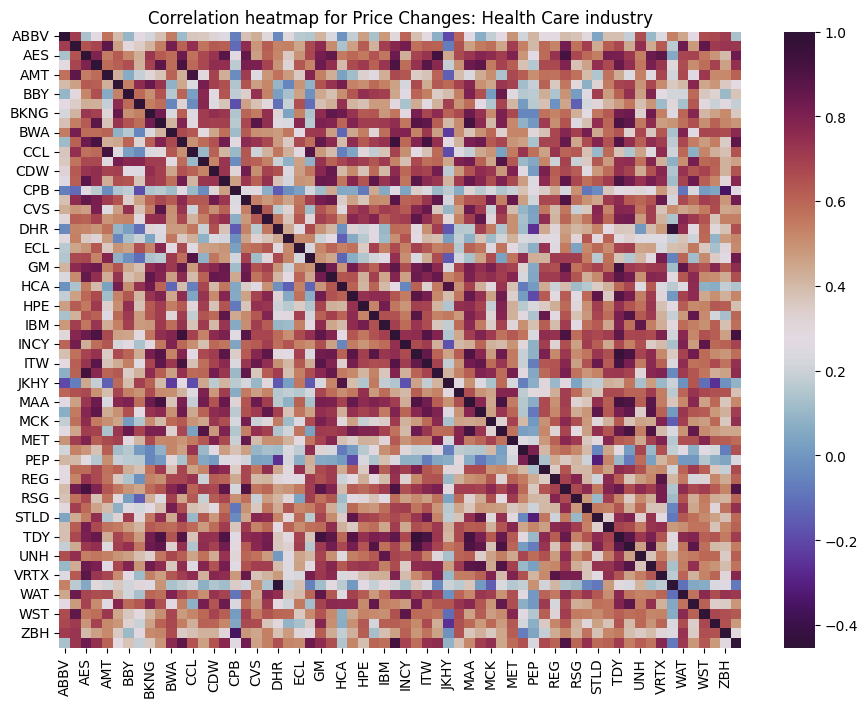

In [199]:
care = df[df['Industry'] == 'Health Care']
care = care.drop(columns= 'Industry', axis = 1)
df_price_care = care.T
df_price_pct_care = df_price_care.pct_change()[1:]

price_corr_care= df_price_pct_care.corr()
plt.figure(figsize=(11,8))
sns.heatmap(price_corr_care, cmap = 'twilight_shifted').set_title("Correlation heatmap for Price Changes: Health Care industry")
plt.show()

## <b> <font color = #f6308e > Industrials </b> 
##### manufacturing, construction, aerospace, defense, and transportation

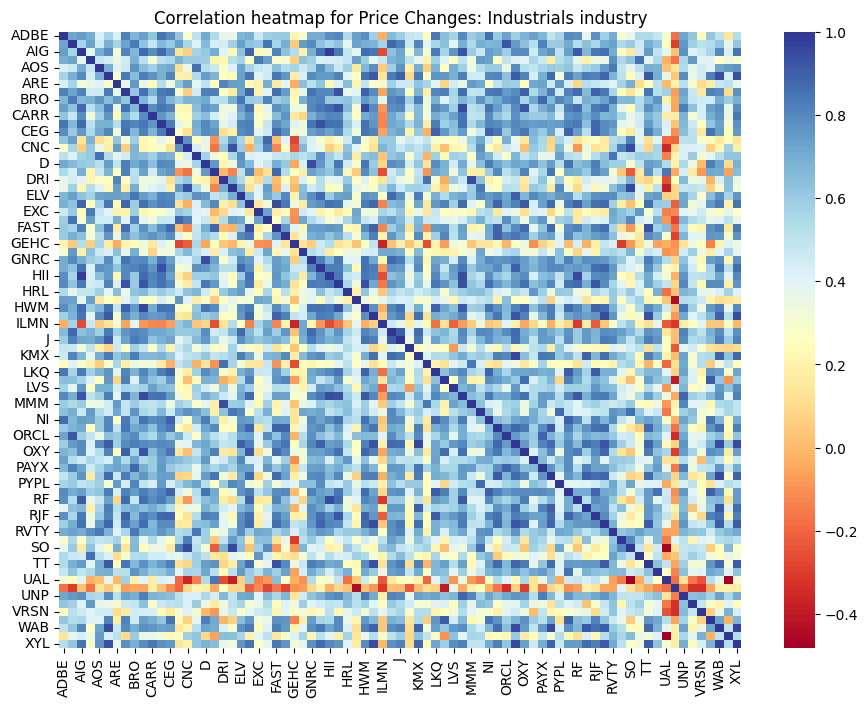

In [200]:
indus = df[df['Industry'] == 'Industrials']
indus = indus.drop(columns= 'Industry', axis = 1)
df_price_indus = indus.T
df_price_pct_indus = df_price_indus.pct_change()[1:]

price_corr_indus = df_price_pct_indus.corr()
plt.figure(figsize=(11,8))
sns.heatmap(price_corr_indus, cmap = 'RdYlBu').set_title("Correlation heatmap for Price Changes: Industrials industry")
plt.show()

## <b> <font color = #f6308e > Materials </b> 
##### production of raw materials and chemicals eg. metals, minerals, and specialty chemicals.

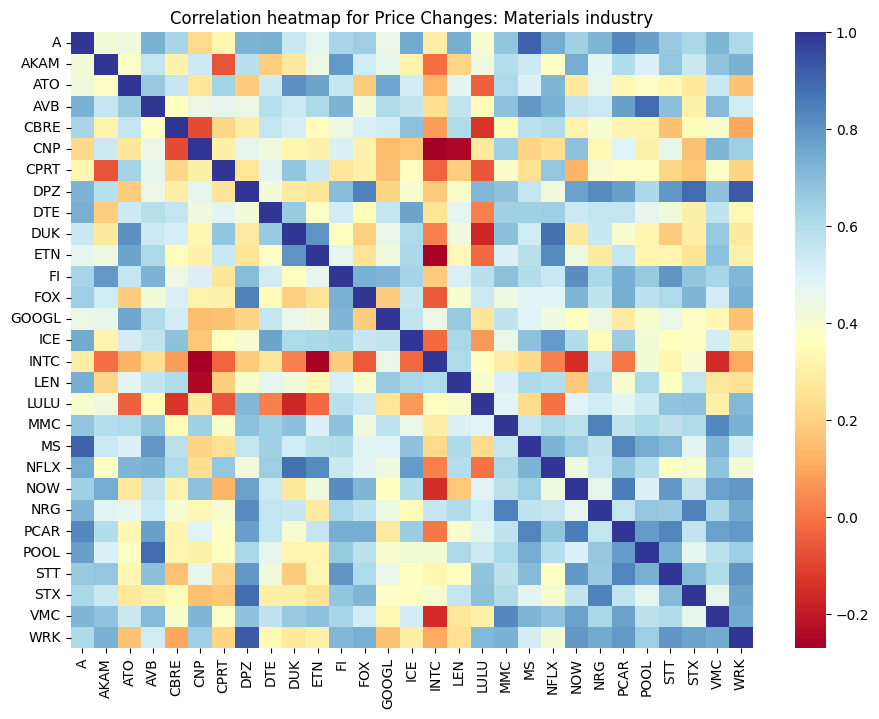

In [201]:
mat = df[df['Industry'] == 'Materials']
mat = mat.drop(columns= 'Industry', axis = 1)
df_price_mat = mat.T
df_price_pct_mat = df_price_mat.pct_change()[1:]

price_corr_mat = df_price_pct_mat.corr()
plt.figure(figsize=(11,8))
sns.heatmap(price_corr_mat, cmap = 'RdYlBu').set_title("Correlation heatmap for Price Changes: Materials industry")
plt.show()

## <b> <font color = #f6308e > Real Estate </b> 
##### residential and commercial properties

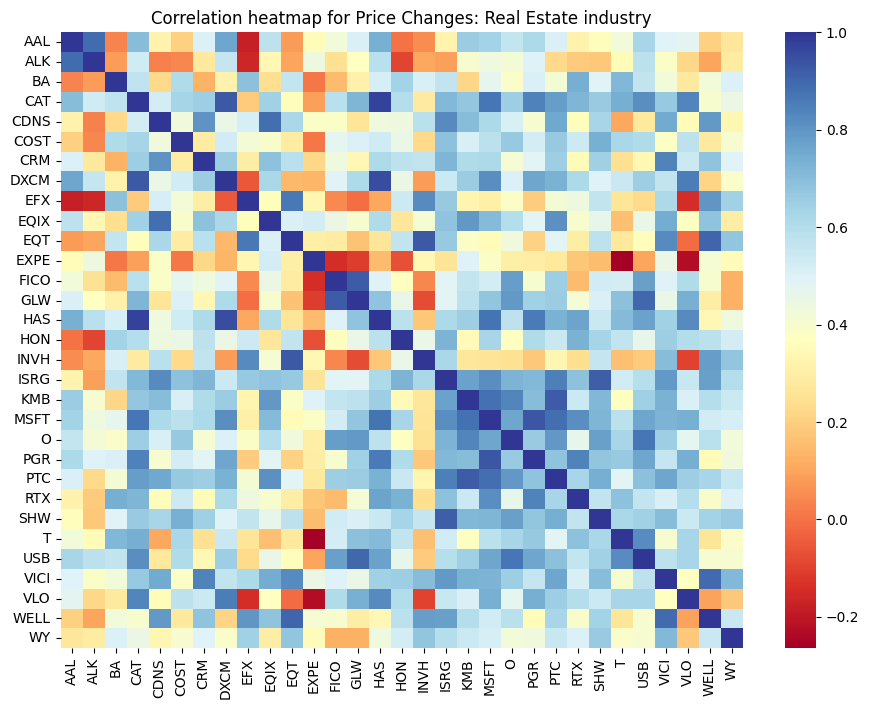

In [202]:
real = df[df['Industry'] == 'Real Estate']
real = real.drop(columns= 'Industry', axis = 1)
df_price_real = real.T
df_price_pct_real = df_price_real.pct_change()[1:]

price_corr_real = df_price_pct_real.corr()
plt.figure(figsize=(11,8))
sns.heatmap(price_corr_real, cmap = 'RdYlBu').set_title("Correlation heatmap for Price Changes: Real Estate industry")
plt.show()

# <b>CLUSTER MAPS

<Figure size 700x500 with 0 Axes>

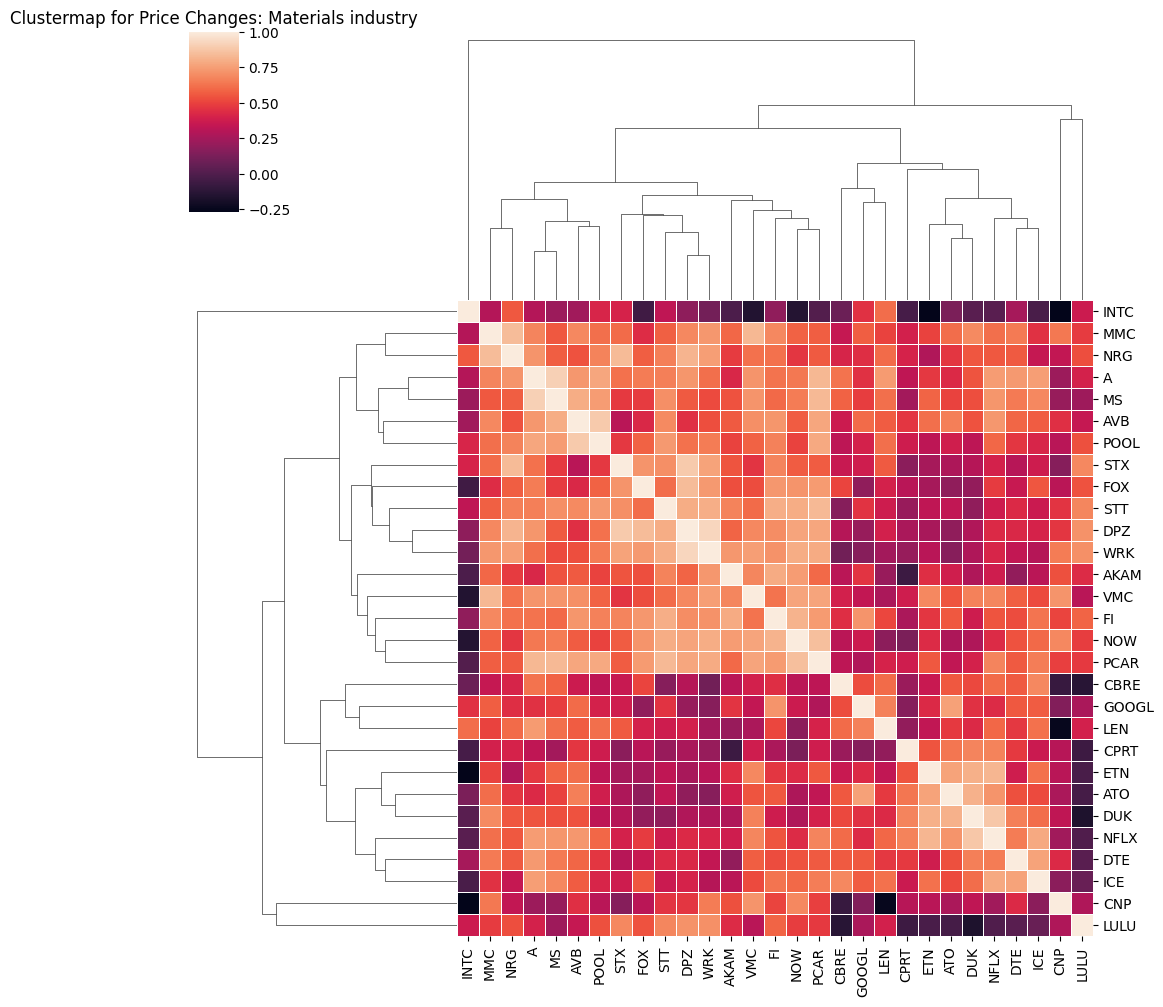

In [203]:
plt.figure(figsize=(7, 5))
sns.clustermap(price_corr_mat, method='average', metric='euclidean', linewidths=0.5, dendrogram_ratio = 0.3)
#dendogram ratio?
plt.title("Clustermap for Price Changes: Materials industry")
plt.show()
#turbo, jet, RdBu

<Figure size 700x1000 with 0 Axes>

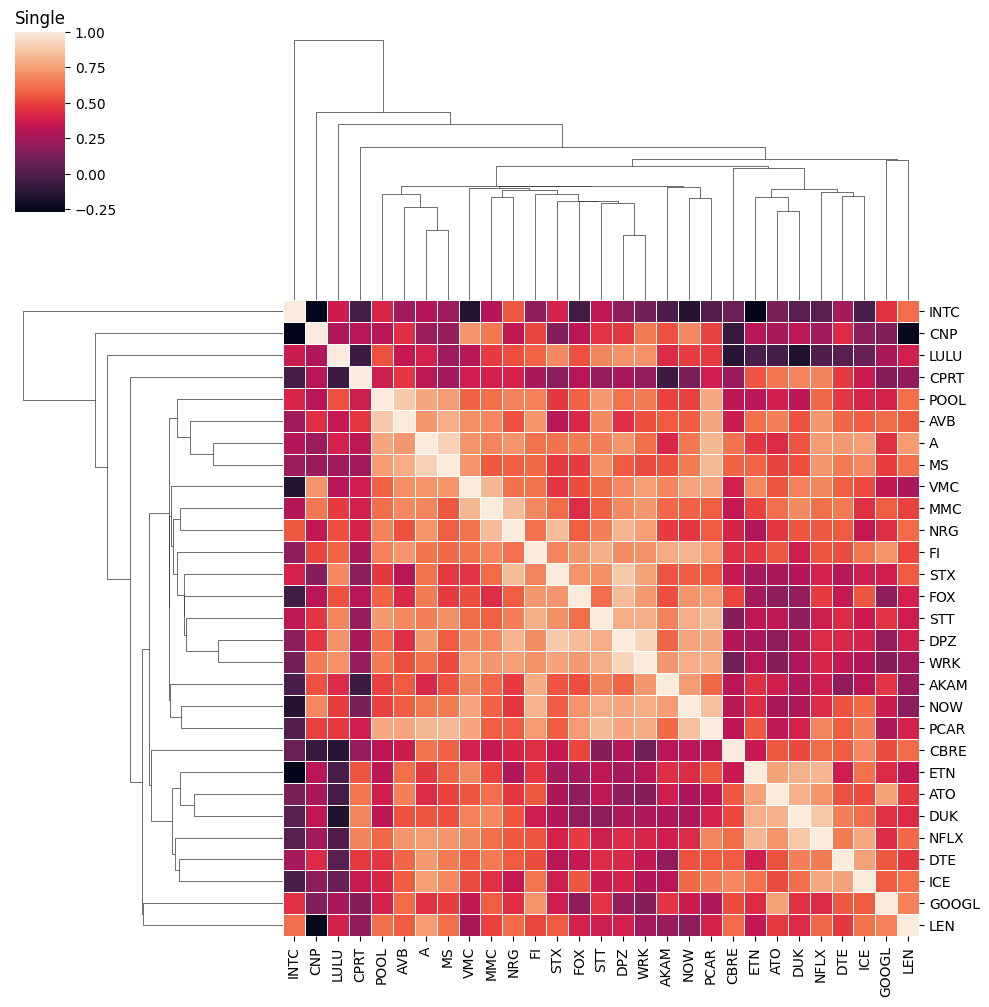

In [204]:
plt.figure(figsize=(7, 10))
sns.clustermap(price_corr_mat, method='single', metric='euclidean', linewidths=0.5, dendrogram_ratio = 0.3)
#dendogram ratio?
plt.title("Single")
plt.show()
#turbo, jet, RdBu

<Figure size 700x500 with 0 Axes>

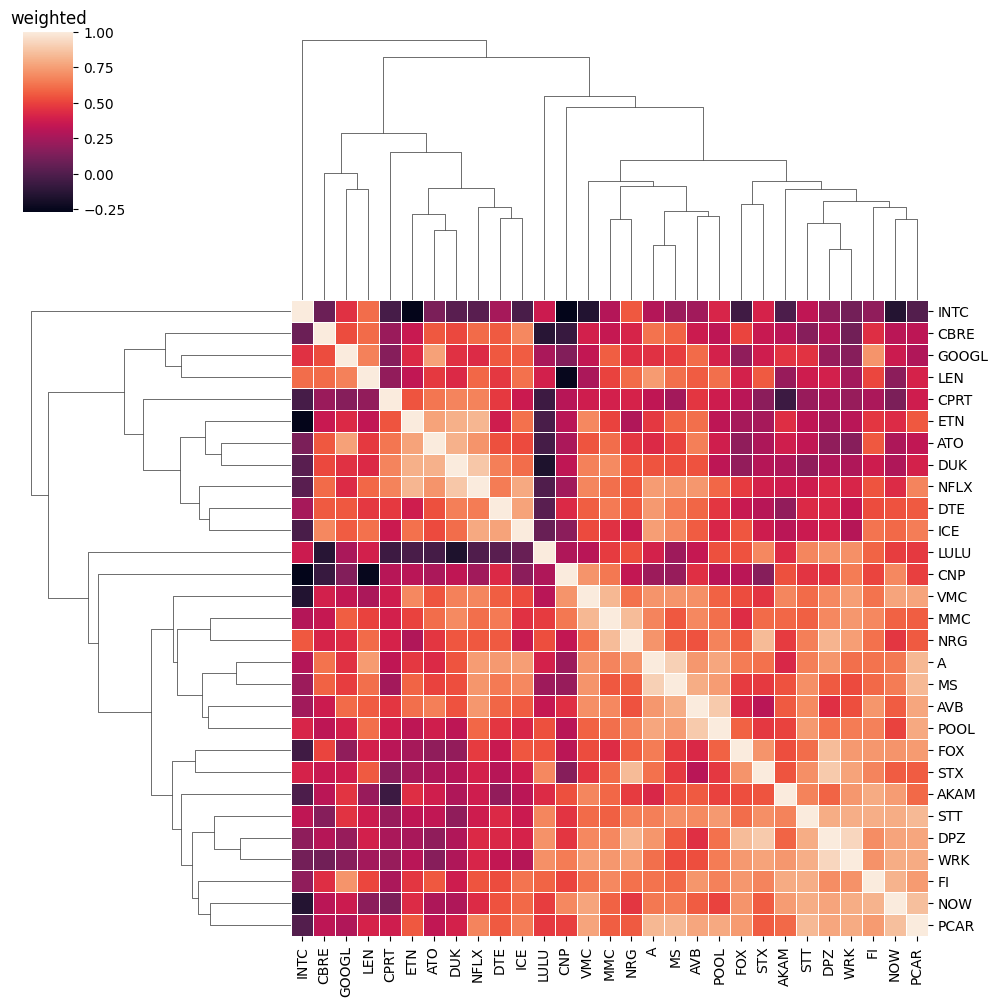

In [205]:
plt.figure(figsize=(7, 5))
sns.clustermap(price_corr_mat, method='weighted', metric='euclidean', linewidths=0.5, dendrogram_ratio = 0.3)
#dendogram ratio?
plt.title("weighted")
plt.show()
#turbo, jet, RdBu

<Figure size 700x500 with 0 Axes>

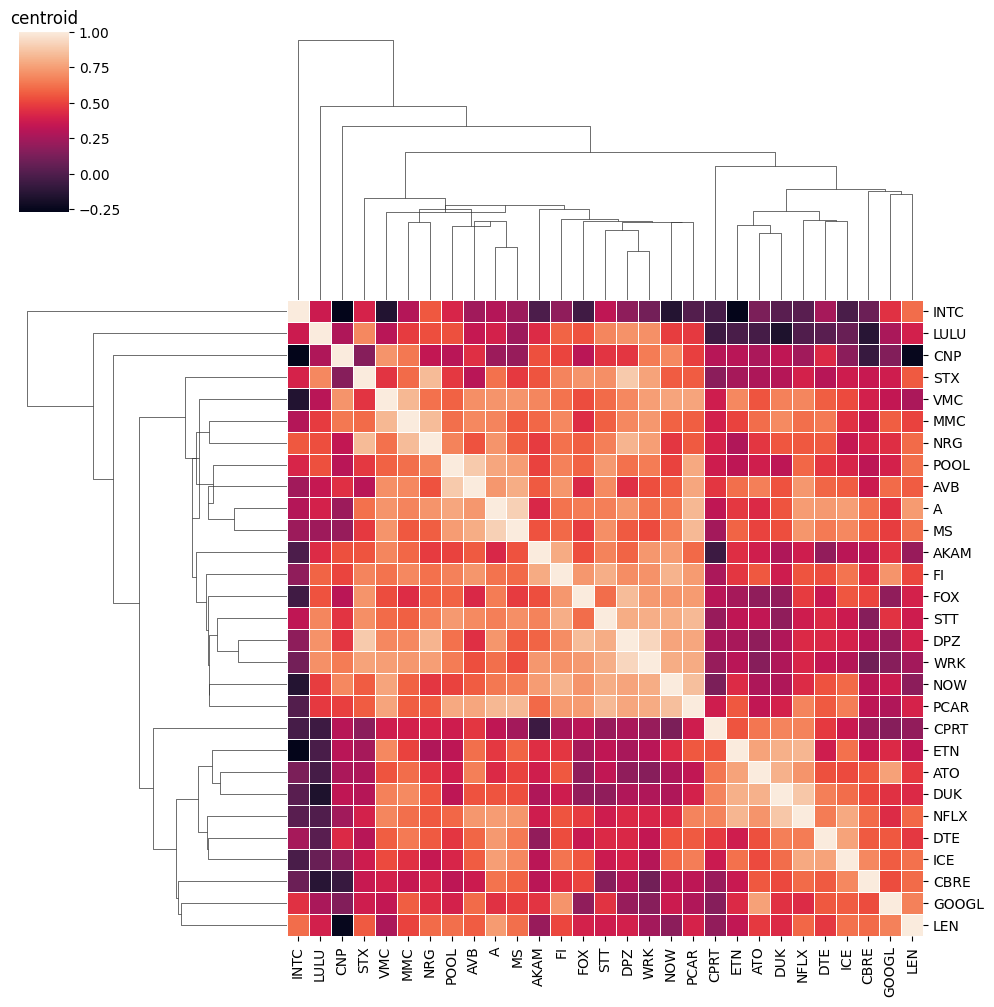

In [206]:
plt.figure(figsize=(7, 5))
sns.clustermap(price_corr_mat, method='centroid', metric='euclidean', linewidths=0.5, dendrogram_ratio = 0.3)
#dendogram ratio?
plt.title("centroid")
plt.show()
#turbo, jet, RdBu

## Graphing Corr Matrix -- IGNORE

In [207]:
! pip3 install networkx
! pip3 install plotly

3725.57s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
3731.45s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [208]:
import networkx as nx
import plotly.graph_objects as go
import matplotlib as plt

In [209]:
threshold = .95

links = price_corr.stack().reset_index()
links.columns = ['company1', 'company2', 'correlation']
#made price_corr go from company names as the row and column indeces to company1 being the first column header, company2 beign the second, and correlation as the third

#filtering out any correlations under the threshold that we will set and getting rid of the self loops in the nodes
links_filtered=links.loc[ (links['correlation'] > threshold) & (links['company1'] != links['company2']) ]
G=nx.from_pandas_edgelist(links_filtered, 'company1', 'company2', edge_attr = 'correlation')
nodes = list(G.nodes)
#df_company_names = pd.DataFrame(nodes, columns=['S&P Names'])
nx.set_node_attributes(G, dictionary, 'GICS Sector')

In [210]:
edges = []
weights = []

# Iterate through the edges of the graph and extract 'correlation' as weights
#were making an edges list and a weights list
for edge in G.edges(data=True):
    source, target, weight = edge
    edges.append((source, target))
    weights.append(weight['correlation'])

In [211]:
val_map = {
    'Materials': 'navy',
    'Consumer Staples': 'purple',
    'Energy': 'teal',
    'Real Estate': 'cyan',
    'Information Technology': 'dodgerblue',
    'Utilities': 'blue',
    'Health Care': 'indigo',
    'Industrials': 'royalblue',
    'Consumer Discretionary': 'skyblue',
    'Communication Services': 'midnightblue',
    'Financials': 'steelblue'
}

#list comprehension so cool
#for every node's sector theres a corresponding color
node_colors = [val_map.get(G.nodes[node]['GICS Sector']) for node in G.nodes()]

In [212]:
from matplotlib import cm
plt.figure(figsize=(18, 14))


pos = nx.spring_layout(G, k=.7, seed =1234)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodes,
                       node_size=600,
                       node_color=node_colors,
                       alpha=.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = edges,
                       width=.8,
                       edge_color= weights,
                       edge_cmap = plt.cm.Blues,
                       alpha=0.9)


nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodes,nodes)),
                        font_color='white',
                        font_size = 10)

cmap = cm.ScalarMappable(cmap=cm.Blues, norm=plt.Normalize(vmin=threshold, vmax=1))


plt.box(False)
plt.show()


TypeError: 'module' object is not callable